# Examen Módulo 1 - Optimización. <font color=blue>Tipo de examen 2</font>.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`+`B`) o (`Esc`+`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (35 puntos)

Considere una cruz simétrica inscrita en un círculo de radio $r$

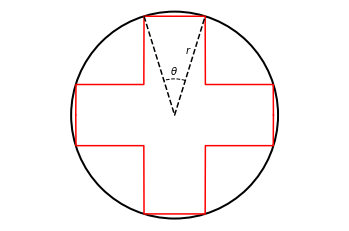

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

ct = np.cos(0.3)
st = np.sin(0.3)
x = np.linspace(-ct,ct,1000)
y = np.zeros(np.shape(x))
y[1:500] = [st if i < -st else ct for i in x[1:500]]
y[500:999] = [st if i > st else ct for i in x[500:999]]

p = patches.Circle((0, 0), 1,fc='w',lw=2,color='k')
ax = plt.gca()
ax.add_artist(p)
plt.text(0.1,0.6,'$r$')

plt.plot(x,y,'r')
plt.plot(x,-y,'r')

plt.plot([-st,0,st],[ct,0,ct],'k--')
plt.text(-0.04,0.4,r'$\theta$')
a = patches.Arc((0, 0),0.7,0.7,90,theta1=-0.3*180/np.pi,theta2=0.3*180/np.pi,
                fc='w',color='k',ls='--')
ax.add_artist(a)

plt.axis([-1,1,-1,1])
plt.axis('equal')
plt.axis('off')
#plt.tight_layout()
plt.show()

1. Escribir el área $A$ de la cruz como una función de $\theta$. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (15 puntos)
2. Determinar el valor de $\theta$ que maximiza el área para un radio $r=2$. (10 puntos)
3. ¿Cuál es el área máxima de la cruz? (10 puntos)

**Pista:** Divida la cruz en cuatro partes iguales determinadas por los ejes $x$ y $y$. El resto es trigonometría básica.

Llamemos $b$ al lado corto de la cruz que toca en dos partes al círculo, y llamemos $x$ a la distancia entre el centro del círculo/cruz y el centro de $b$.

De esta forma, podemos decir que el área del rectángulo es 

$$ A(x, b) = (2 x b)(2) - b^2 $$

Si dibujamos un triángulo rectángulo con $x$ y $b$, podemos decir que 

$$ \sin{\frac{\theta}{2}} = \frac{b}{2r} $$

$$ \cos{\frac{\theta}{2}} = \frac{x}{r} $$



Por lo tanto

$$ b = 2 r \sin{\frac{\theta}{2}} $$

$$ x = r \cos{\frac{\theta}{2}} $$

Sustituimos en fórmula del área

$$ A(\theta) = (2 (r \cos{\frac{\theta}{2}}) (2 r \sin{\frac{\theta}{2}}))(2) - (2 r \sin{\frac{\theta}{2}})^2 $$

In [4]:
import numpy as np
import sympy as sp
r = 2
theta = sp.var("t")

def X(theta) :
    return r*sp.cos(theta/2)

def b(theta) :
    return 2*r*sp.sin(theta/2)

def A(theta) :
    return 4*X(theta)*b(theta) - b(theta)**2
A(theta)

-16*sin(t/2)**2 + 32*sin(t/2)*cos(t/2)

In [5]:
dA = sp.diff(A(theta), theta)
dA

-16*sin(t/2)**2 - 16*sin(t/2)*cos(t/2) + 16*cos(t/2)**2

In [6]:
pc = sp.solve(dA, theta)
for valor in pc: print(float(valor))

4.2487413713838835
-5.176036589385496
-2.0344439357957027
1.1071487177940904


Valor de $\theta$ que maximiza $= 1.1071$

In [7]:
X(1.1071)

1.70132722865941

In [38]:
def An(theta) :
    return 2*(2*np.cos(theta/2))*(2*2*np.sin(theta/2))*2 - (2*2*np.sin(theta/2))**2


for valor in pc :
    print(An(float(valor)))
    

-25.88854381999832
9.888543819998318
-25.88854381999831
9.888543819998318


Área máxima $= 9.88854$

---
# Segundo punto. Programación lineal (35 puntos)

Un empresario pretende fabricar dos tipos de congeladores denominados A y B. Cada uno de ellos debe pasar por tres operaciones antes de su comercialización: 
<table>
  <tr>
      <th></th>
      <th>Ensamblaje</th>
      <th>Pintura</th>
      <th>Calidad</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>2.5 horas</td>
      <td>3 kg</td>
      <td>14 horas</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Congeladores tipo B</th>
      <td>3 horas</td>
      <td>6 kg</td>
      <td>10 horas</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td>4500 horas</td>
      <td>8400 kg</td>
      <td>20000 horas</td>
  </tr>
</table>

El empresario dispone semanalmente de:

* Máximo 4500 horas para ensamblaje
* Máximo 8400 Kg. de esmalte
* 20000 horas máximo, para control de calidad

Los costos totales de fabricación por unidad son, respectivamente, 30 y 28, y los precios de venta 52 y 48, todos ellos en miles de pesos. Además, los estudios de mercado muestran que la demanda semanal de congeladores no supera las 1700 unidades y que, en particular, la de tipo A es de, al menos 600 unidades.

<table>
  <tr>
      <th></th>
      <th>Costo</th>
      <th>Precio de venta</th>
  </tr>
  <tr>
      <th>Congeladores tipo A</th>
      <td>30</td>
      <td>52</td>
  </tr>
  <tr>
      <th>Congeladores tipo B</th>
      <td>28</td>
      <td>48</td>
  </tr>
</table>

Se desea conocer las unidades necesarias para **maximizar** la utilidad.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(25 puntos)}
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos congeladores de cada tipo se deben producir (valores enteros)?, ¿Cuál es la ganancia? (10 puntos)

Función a optimizar

$$ \max_{C_A, C_B} (52 - 30)C_A + (48 - 28)C_B $$

Igual a

$$ \min_{C_A, C_B} -22 C_A - 20C_B $$

Restricciones

$ 2.5 C_A + 3 C_B \leq 4500 $

$ 3 C_A + 6 C_B \leq 8400 $

$ 14 C_A + 10 C_B \leq 20000 $

$ C_A + C_B \leq 1700 $

$ C_A \geq 600 $

In [41]:
import scipy.optimize as opt
import numpy as np

c = np.array([-22,
              -20])
A = np.array([[  2.5,   3.0],
              [  3.0,   6.0],
              [ 14.0,  10.0],
              [  1.0,   1.0],
              [ -1.0,   0.0]])
b = np.array([4500,
              8400,
             20000,
              1700,
              -600])
opt.linprog(c,A,b, method="simplex")

     con: array([], dtype=float64)
     fun: -34705.882352941175
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([   0.        , 1164.70588235,    0.        ,   52.94117647,
        282.35294118])
  status: 0
 success: True
       x: array([882.35294118, 764.70588235])

---
# Tercer punto. Ajuste de curvas (30 puntos)
Los siguientes datos extraidos de Administrative Office of the U.S. Courts, representan el número de bancarrotas en miles entre los años 1988 y 2001. 

In [42]:
import pandas as pd

date_rng=pd.date_range(start='1/1/1988', end='31/12/2001', freq='Y')
ban=pd.DataFrame(date_rng, columns=['date'])
ban = ban.set_index('date')
ban['values'] = np.array([594.6,643.0,725.5,880.4,972.5,918.7,845.3,858.1,
                           1042.1,1317.0,1429.5,1392.0,1277.0,1386.6])

In [52]:

x = np.arange(len(date_rng))
y = np.array(ban["values"])

import numpy as np
import scipy.optimize as opt
m = x.shape[0]
y = np.reshape(y, [m, -1])
ones = np.ones([m, 1])
x = np.reshape(x, [m, -1]) - np.min(x)
x2 = x**2
x3 = x**3
x4 = x**4
x5 = x**5

1. Ajuste los salarios con polinomios de grado 1 a 5 y muestre los errores de forma gráfica, ¿Qué polinómio se ajusta mejor? (20 puntos)
2. Muestre en un gráfico los datos y el polinómio que mejor se ajuste (5 puntos)
3. Usar el modelo para averiguar el número de bancarrotas a mdiados de 1995 y predecirlo para el año 2020. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación? (5 puntos)

In [55]:
def funcion_de_costo(theta, X, y) :
    m, n = X.shape
    theta = np.reshape(theta, [n, -1]) 
    prediccion = X @ theta
    costo = (y - prediccion).T @ (y - prediccion)
    return costo[0][0]

X1 = np.hstack((ones, x))
X2 = np.hstack((ones, x, x2))
X3 = np.hstack((ones, x, x2, x3))
X4 = np.hstack((ones, x, x2, x3, x4))
X5 = np.hstack((ones, x, x2, x3, x4, x5))
t1 = np.random.rand(2)
t2 = np.random.rand(3)
t3 = np.random.rand(4)
t4 = np.random.rand(5)
t5 = np.random.rand(6)

sol1 = opt.minimize(funcion_de_costo, t1, args=(X1, y))
sol2 = opt.minimize(funcion_de_costo, t2, args=(X2, y))
sol3 = opt.minimize(funcion_de_costo, t3, args=(X3, y))
sol4 = opt.minimize(funcion_de_costo, t4, args=(X4, y))
sol5 = opt.minimize(funcion_de_costo, t5, args=(X5, y))

### 1. Graficar errores

<BarContainer object of 5 artists>

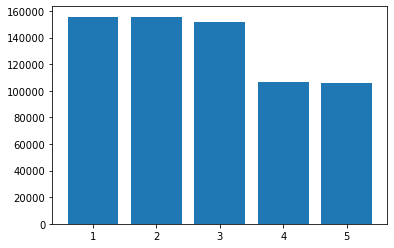

In [56]:
costos = [sol1.fun, sol2.fun, sol3.fun, sol4.fun, sol5.fun]
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.bar([1, 2, 3, 4, 5], costos)

### 2. Graficar polinomio que se ajusta mejor

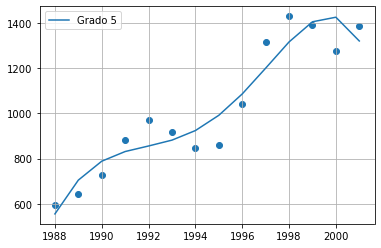

In [57]:
plt.figure()
plt.scatter(x + 1988, y)
plt.plot(x + 1988, X5 @ sol5.x, label="Grado 5")
plt.legend(loc="best")
plt.grid()

## 3. Diferencias entre interpolación y extrapolación

In [58]:
np.array([1, 0.5, 0.5**2, 0.5**3, 0.5**4, 0.5**5]) @ sol5.x

639.5527243395381

In [59]:
np.array([1, 23, 23**2, 23**3, 23**4, 23**5]) @ sol5.x

-32093.328063864705

La interpolación de un modelo con sobreajute es buena, pero debido al sobreajuste no generaliza, entonces la extrapolación es mala.